In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk


In [41]:
#Importo de kaggle el dataset de Bank Customer Churn Prediction
#de este linkhttps://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction
ds=pd.read_csv('Churn_Modelling.csv')
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [49]:
ds

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.000000,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.000000,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.000000,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.000000,0.0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,0.705529,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,0,0,36.0,7,0.00,1,0.000000,1.0,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1.000000,0.0,92888.52,1
9999,772,1,1,42.0,3,75075.31,2,1.000000,0.0,92888.52,1
10000,792,0,0,28.0,4,130142.79,1,1.000000,0.0,38190.78,0


Utilizamos este dataset para predecir si el cliente se quedo en el banco o lo abandono en relacion a los datos del dataset tales como historial crediticio, si es activo, su saldo estimado...etc

In [42]:
#analizo el dataset las colmnas
ds.columns
#ds.describe()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

CreditScore        0
Geography          0
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


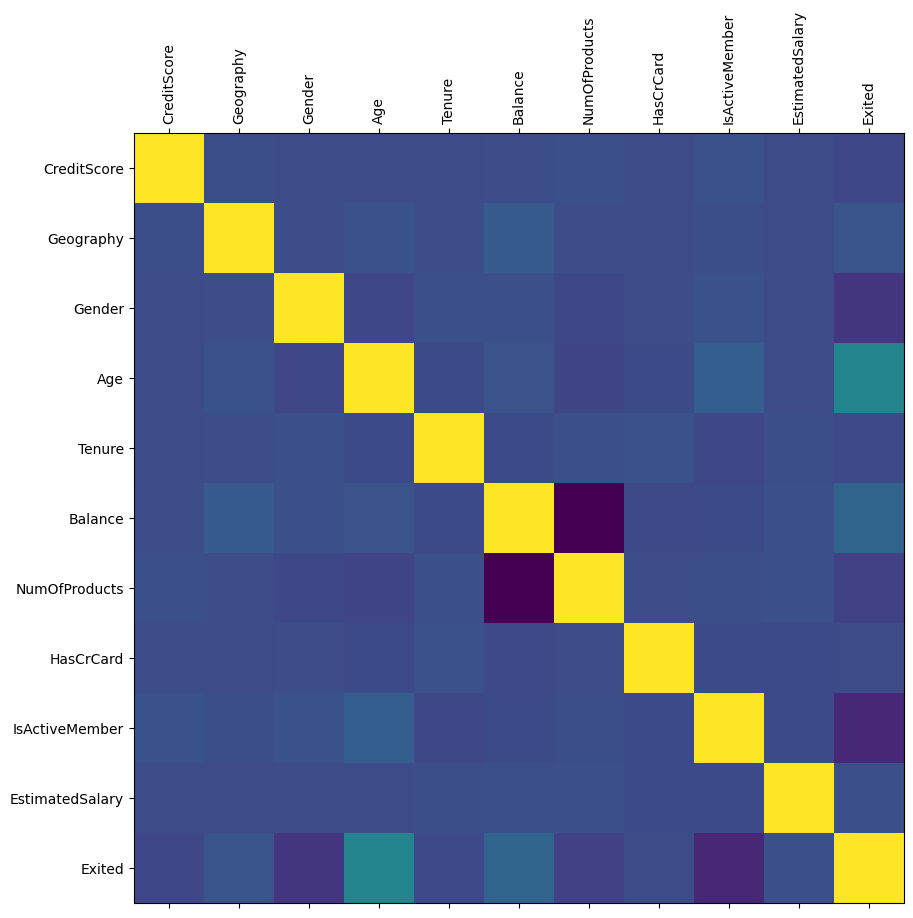

In [43]:
#grafico de correlacion entre columnas 
#preparo el dataset con los datos que quiero
ds = ds.drop(['RowNumber','CustomerId','Surname'], axis=1)

#transformo las columnas categoricas en numericas
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ds['Geography'] = labelencoder.fit_transform(ds['Geography'])
ds['Gender']= labelencoder.fit_transform(ds['Gender'])

# Me desago de las rows con valores nulos
# Chequeo de valores nulos
nan_count = ds.isnull().sum()

print(ds.isnull().sum())
# Que tantos valores nulos tengo?
if nan_count.sum() < 0.1 * len(ds):
    # Llenar los valores nulos con la media de la columna
    ds = ds.fillna(ds.mean())
else:
    # dropear las filas con valores nulos
    ds = ds.dropna()

print(ds.isnull().sum()) # Verifico que no haya valores nulos

# me aseguro de utilizar las columnas numericas
numeric_columns = ds.select_dtypes(include=[np.number]).columns
ps= ds[numeric_columns].corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(ps)
plt.xticks(range(len(ps.columns)), ps.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(ps.columns)), ps.columns)

plt.show()


Siendo que los datos nulos eran muy pocos (3) los quito para el analisis

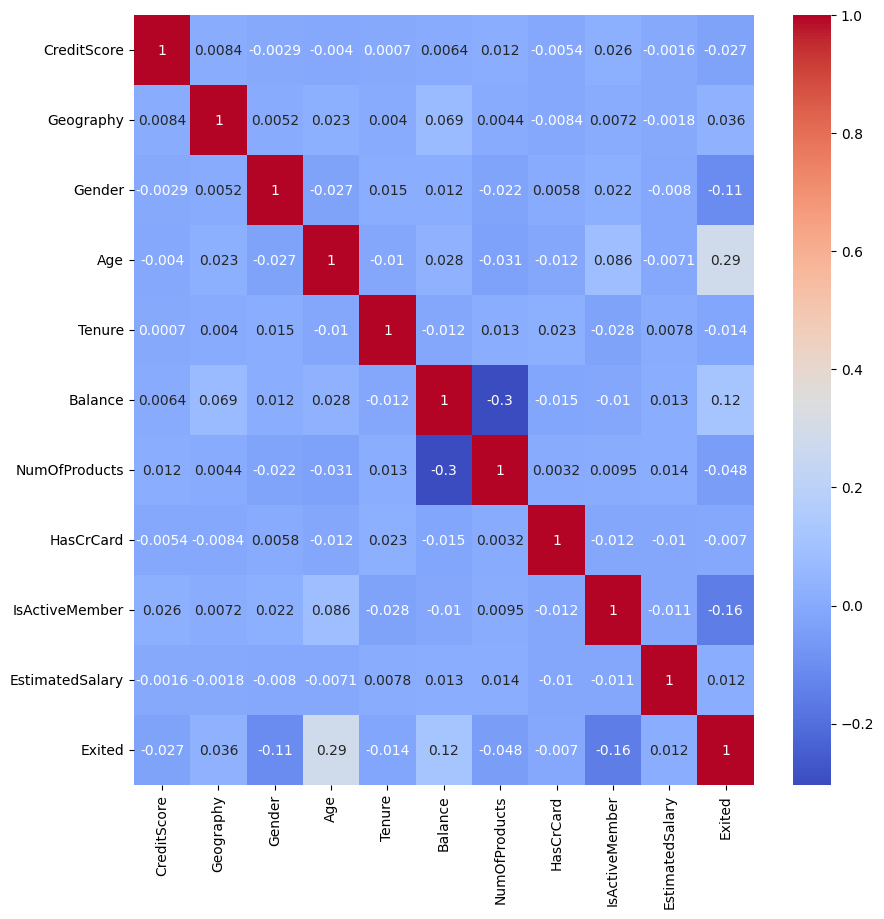

In [44]:
fig, ax =plt.subplots(figsize=(10, 10))
sns.heatmap(ps, annot=True, cmap='coolwarm', ax=ax)
plt.show()

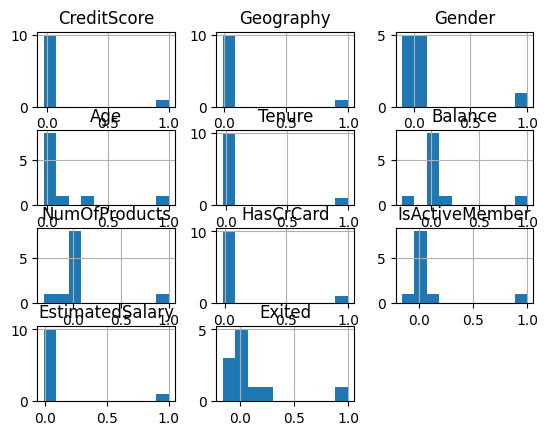

In [45]:
ps.hist()
plt.show()

In [46]:
#instanceo de la informacion para los modelos

from sklearn.model_selection import train_test_split

seed = 42

X = ds.drop("Exited", axis=1)
y = ds["Exited"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) 



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Accuracy:  0.7996001999000499
Cross Validation:  0.7911513116801998


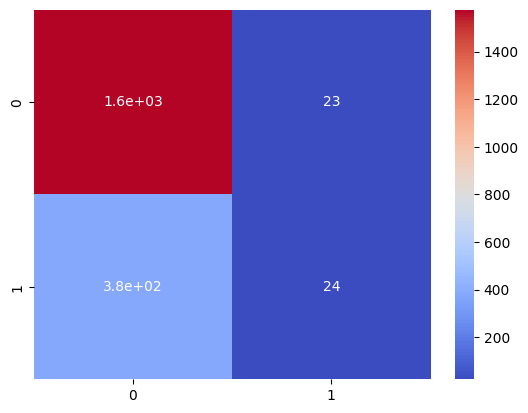

In [48]:
#Regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(lr, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [54]:
#evaluacion de la regresion logistica

predictions = lr.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1599
           1       0.51      0.06      0.11       402

    accuracy                           0.80      2001
   macro avg       0.66      0.52      0.50      2001
weighted avg       0.75      0.80      0.73      2001



Se obtiene una precision del 79%

Comienzo a usar modelos de arboles de decision

In [59]:
#arbol de decision
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(dt, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())


Accuracy:  0.777111444277861
Cross Validation:  0.7894017020612117


In [63]:
#evaluacion del arbol de decision
predictions = dt.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1599
           1       0.45      0.52      0.49       402

    accuracy                           0.78      2001
   macro avg       0.66      0.68      0.67      2001
weighted avg       0.79      0.78      0.78      2001



Ahora voy a probar usar randomforest para encontrar los mejores hiperparametros
Pruebo con iteraciones alta, baja y media.

Prueba con muchas iteraciones(100):
Se me va de tiempo, tarada mucho, no llego a ver el resultado.

Prueba pocas iteraciones(5):
muy rapido(1.4s), acuraccy de 83%

Prueba media(25):
media velocidad (4.7s), accuracy 84.7%

Queda en media por ganancia-tiempo

In [58]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25, random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(rf, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())

#printeo los mejores hiperparametros para el modelo
print(rf.get_params())

Accuracy:  0.8570714642678661
Cross Validation:  0.8571428794503436
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [65]:
#evaluacion del random forest
predictions = rf.predict(X_test)
print(predictions)

#confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1599
           1       0.71      0.49      0.58       402

    accuracy                           0.86      2001
   macro avg       0.80      0.72      0.75      2001
weighted avg       0.85      0.86      0.85      2001



Aca se termina el tp con una conclusion de cual es la categorizacion de persona que es mas propensa a dejar el banco (output=1) y cual de que se quede (output=0)

In [69]:
#evaluacion mas propensa a irse con sus valores 
import numpy as np

# Obtener los coeficientes del modelo de regresión logística
coefficients = lr.coef_[0]

# Crear un DataFrame con los nombres de las columnas y los coeficientes
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Mostrar los coeficientes más importantes
print(coef_df)


           Feature  Coefficient
1        Geography     0.052100
3              Age     0.050602
5          Balance     0.000003
9  EstimatedSalary     0.000002
0      CreditScore    -0.004495
4           Tenure    -0.030622
7        HasCrCard    -0.105176
6    NumOfProducts    -0.276007
2           Gender    -0.378217
8   IsActiveMember    -0.576723
